In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Example model: A simple linear layer

In [2]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # Input size: 2, Output size: 1

    def forward(self, x):
        return self.linear(x)

# Initialize model, optimizer, and loss function
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using SGD for simplicity
loss_fn = nn.MSELoss()

In [3]:
# Example data: Inputs (X) and targets (y)
X = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)  # Enable gradients for input
y = torch.tensor([[1.0], [0.0]])

# To store gradients for visualization
gradients_per_epoch = {"weights": [], "bias": [], "input": []}

## Training loop

In [4]:
epochs = 10
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = loss_fn(predictions, y)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass: Compute gradients
    loss.backward()
    
    # Log gradients for model parameters
    weight_grad = model.linear.weight.grad.clone().detach().numpy()
    bias_grad = model.linear.bias.grad.clone().detach().numpy()
    gradients_per_epoch["weights"].append(weight_grad)
    gradients_per_epoch["bias"].append(bias_grad)
    
    # Log gradients for input
    input_grad = X.grad.clone().detach().numpy() if X.grad is not None else None
    gradients_per_epoch["input"].append(input_grad)
    
    # Print gradients
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Loss: {loss.item():.4f}")
    print(f"Weight gradients:\n{weight_grad}")
    print(f"Bias gradients:\n{bias_grad}")
    print(f"Input gradients:\n{input_grad}\n")
    
    # Update model parameters
    optimizer.step()
    
    # Reset input gradients to prevent accumulation
    X.grad = None

Epoch 1/10
Loss: 0.4600
Weight gradients:
[[0.97142696 0.78534746]]
Bias gradients:
[-0.1860795]
Input gradients:
[[ 0.1560248  -0.2874177 ]
 [-0.11806484  0.2174906 ]]

Epoch 2/10
Loss: 0.4460
Weight gradients:
[[0.7717788 0.503443 ]]
Bias gradients:
[-0.26833582]
Input gradients:
[[ 0.16848975 -0.29007986]
 [-0.11114293  0.19134891]]

Epoch 3/10
Loss: 0.4377
Weight gradients:
[[0.63485265 0.31080592]]
Bias gradients:
[-0.32404673]
Input gradients:
[[ 0.17791873 -0.29159182]
 [-0.10616485  0.17399406]]

Epoch 4/10
Loss: 0.4321
Weight gradients:
[[0.5408165  0.17920828]]
Bias gradients:
[-0.3616082]
Input gradients:
[[ 0.18514359 -0.2924493 ]
 [-0.10277677  0.16234423]]

Epoch 5/10
Loss: 0.4278
Weight gradients:
[[0.47611016 0.08934903]]
Bias gradients:
[-0.38676113]
Input gradients:
[[ 0.19079313 -0.29291734]
 [-0.10060532  0.1544555 ]]

Epoch 6/10
Loss: 0.4241
Weight gradients:
[[0.43146047 0.02802908]]
Bias gradients:
[-0.4034314]
Input gradients:
[[ 0.19532648 -0.29314354]
 [-0.099

## Visualizing gradients

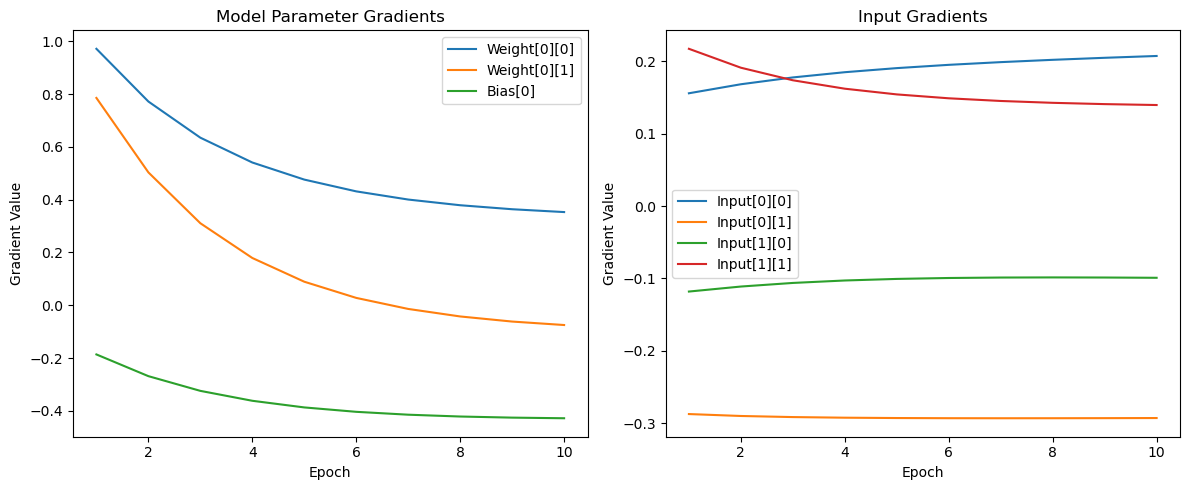

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Weight and bias gradients
axes[0].plot(range(1, epochs + 1), [g[0][0] for g in gradients_per_epoch["weights"]], label="Weight[0][0]")
axes[0].plot(range(1, epochs + 1), [g[0][1] for g in gradients_per_epoch["weights"]], label="Weight[0][1]")
axes[0].plot(range(1, epochs + 1), [g[0] for g in gradients_per_epoch["bias"]], label="Bias[0]")
axes[0].set_title("Model Parameter Gradients")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Gradient Value")
axes[0].legend()

# Input gradients
if gradients_per_epoch["input"][0] is not None:
    axes[1].plot(range(1, epochs + 1), [g[0][0] for g in gradients_per_epoch["input"]], label="Input[0][0]")
    axes[1].plot(range(1, epochs + 1), [g[0][1] for g in gradients_per_epoch["input"]], label="Input[0][1]")
    axes[1].plot(range(1, epochs + 1), [g[1][0] for g in gradients_per_epoch["input"]], label="Input[1][0]")
    axes[1].plot(range(1, epochs + 1), [g[1][1] for g in gradients_per_epoch["input"]], label="Input[1][1]")
    axes[1].set_title("Input Gradients")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Gradient Value")
    axes[1].legend()

plt.tight_layout()
plt.show()

---